🎥 Recommended Video: [Vision Transformers Explained](https://www.youtube.com/watch?v=tkZMj1VKD9s)

🎥 Recommended Video: [What is YOLO algorithm? ](https://www.youtube.com/watch?v=ag3DLKsl2vk&t=324s)


## **5.0 Advanced Topics in Computer Vision**

### **Vision Transformers (ViT)**
Vision Transformers (ViTs) are a recent innovation in computer vision that adapt the Transformer architecture, originally designed for natural language processing (NLP), to image data. ViTs divide an image into patches, treat each patch as a token, and apply self-attention mechanisms(helps the model decide which parts of the image are important to look at in relation to each other) to learn relationships between patches.

#### **Key Advantages of ViTs**:
- **Scalability**: Perform well on large datasets.
- **Global Context**: Capture long-range dependencies in images.
- **Flexibility**: Can be applied to various vision tasks.

#### **Example: Using a Pre-trained ViT Model**
Let’s use the Hugging Face `transformers` library to load and use a pre-trained Vision Transformer model.

```python
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image

# Load a pre-trained ViT model and feature extractor
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Load and preprocess an image
image = Image.open('example.jpg')
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted class
predicted_class = logits.argmax(dim=-1).item()
print(f"Predicted Class: {predicted_class}")
```

#### **Explanation**:
1. The `ViTForImageClassification` model is loaded with pre-trained weights.
2. The `ViTFeatureExtractor` preprocesses the image into the required format.
3. The model predicts the class of the input image.

---

### **5.1 YOLO (You Only Look Once) for Object Detection**
YOLO is a state-of-the-art real-time object detection framework. It divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell in a single forward pass.

#### **Key Features of YOLO**:
- **Speed**: Processes images in real-time.
- **Accuracy**: Achieves high precision and recall.
- **Versatility**: Can detect multiple objects in a single image.

#### **Example: Object Detection with YOLOv8**
Let’s use the Ultralytics library to perform object detection with YOLOv8.

```python
from ultralytics import YOLO
import cv2

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Perform object detection on an image
results = model('example.jpg')

# Visualize the results
results.show()

# Save the results
results.save('output.jpg')
```

#### **Explanation**:
1. The `YOLO` class loads a pre-trained YOLOv8 model.
2. The `model('example.jpg')` method performs object detection on the input image.
3. The results are displayed and saved.

---

### **5.2. Image Segmentation**
Image segmentation involves dividing an image into regions or objects. There are two main types:
- **Semantic Segmentation**: Assigns a class label to each pixel.
- **Instance Segmentation**: Differentiates between individual instances of objects.

#### **Example: Semantic Segmentation with U-Net**
Let’s implement a U-Net model for semantic segmentation using TensorFlow/Keras.

```python
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Define the U-Net architecture
def unet(input_shape):
    inputs = Input(input_shape)

    # Downsample path
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)

    # Upsample path
    up1 = UpSampling2D((2, 2))(conv3)
    concat1 = concatenate([up1, conv2])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)

    up2 = UpSampling2D((2, 2))(conv4)
    concat2 = concatenate([up2, conv1])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    return Model(inputs, outputs)

# Create the U-Net model
model = unet((256, 256, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
```

#### **Explanation**:
1. The U-Net architecture consists of a downsampling path (encoder) and an upsampling path (decoder).
2. Skip connections concatenate feature maps from the encoder to the decoder.
3. The model is compiled with binary cross-entropy loss for binary segmentation tasks.

---

### **5.3 Code Example: Instance Segmentation with Mask R-CNN**
Mask R-CNN is a popular framework for instance segmentation. Let’s use the `mrcnn` library to perform instance segmentation.

```python
import mrcnn
from mrcnn.config import Config
from mrcnn import model as modellib
import cv2

# Define a custom configuration
class CustomConfig(Config):
    NAME = "custom"
    NUM_CLASSES = 1 + 80  # COCO dataset has 80 classes
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

# Load the Mask R-CNN model
model = modellib.MaskRCNN(mode="inference", config=CustomConfig(), model_dir='./')
model.load_weights('mask_rcnn_coco.h5', by_name=True)

# Load and preprocess an image
image = cv2.imread('example.jpg')
results = model.detect([image], verbose=1)

# Visualize the results
r = results[0]
mrcnn.visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                  ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                                   'bus', 'train', 'truck', 'boat', 'traffic light'], r['scores'])
```

#### **Explanation**:
1. A custom configuration is defined for the Mask R-CNN model.
2. The model is loaded with pre-trained weights from the COCO dataset.
3. The `model.detect()` method performs instance segmentation on the input image.
4. The results are visualized, showing bounding boxes, masks, and class labels.


🎥 Optional Video: [Image Segmentation using YOLO](https://www.youtube.com/watch?v=Rwvd0PJF2jk)

---

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e261159d401ae501f2d027420e1fcbd6d3b45a1e976899f42935cad7a6b68d6b
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import wget
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
from google.colab import files

# Download ImageNet labels
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
filename = wget.download(url)

# Load ImageNet labels into a list
with open(filename, "r") as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

# Load a pre-trained ViT model and feature extractor
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Upload the image from your local system. This will prompt you to select the file.
uploaded = files.upload()

# Get the filename from the uploaded dictionary
# Assuming you've uploaded only one file, it'll be the first key in the dictionary
filename = list(uploaded.keys())[0]

# Load and preprocess an image
image = Image.open(filename).convert('RGB') # Convert image to RGB
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted class
predicted_class = logits.argmax(dim=-1).item()
print(f"Predicted Class: {predicted_class}")

# Get the human-readable label
predicted_label = imagenet_labels[predicted_class]
print(f"Predicted Label: {predicted_label}")

Saving image2.jpg to image2.jpg
Predicted Class: 208
Predicted Label: Labrador retriever


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from PIL import Image
from google.colab import files
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Upload the image from your local system. This will prompt you to select the file.
uploaded = files.upload()

# Get the filename from the uploaded dictionary
# Assuming you've uploaded only one file, it'll be the first key in the dictionary
filename = list(uploaded.keys())[0]

# Perform object detection on an image
# we are now providing a list containing our single filename
results = model([filename])

# Access the results for the first (and only) image
results = results[0] #results is a list, accessing the first element which is the results objects

# Visualize the results
results.show()

# Save the results
results.save('output.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Define the U-Net architecture
def unet(input_shape):
    inputs = Input(input_shape)

    # Downsample path
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)

    # Upsample path
    up1 = UpSampling2D((2, 2))(conv3)
    concat1 = concatenate([up1, conv2])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)

    up2 = UpSampling2D((2, 2))(conv4)
    concat2 = concatenate([up2, conv1])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    return Model(inputs, outputs)

# Create the U-Net model
model = unet((256, 256, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 128, 128, 256)  │              0 │ conv2d_2[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 384)  │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        442,496 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 256, 256, 128)  │              0 │ conv2d_3[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 192)  │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 64)   │        110,656 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 1)    │             65 │ conv2d_4[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 922,881 (3.52 MB)

 Trainable params: 922,881 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

Saving seg_trainer.png to seg_trainer.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


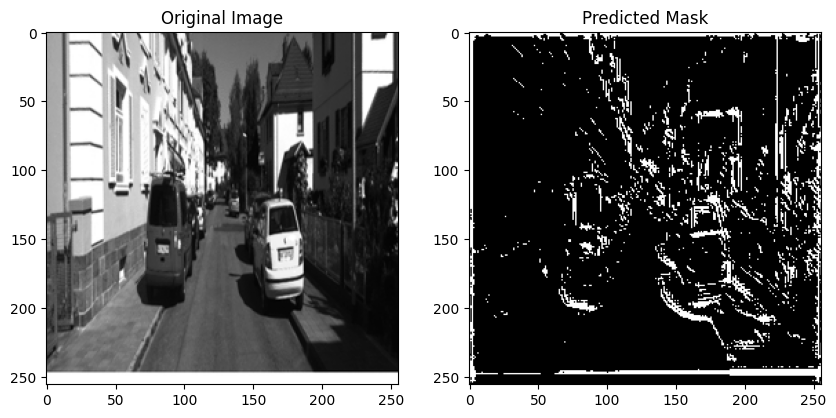

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Upload the image from your local system.
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load and preprocess the image
image = Image.open(filename).convert('L')  # Convert to grayscale for single channel
image = image.resize((256, 256))  # Resize to match input shape
image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Perform inference (prediction)
prediction = model.predict(image_array)

# Post-processing
# 1. Thresholding:
predicted_mask = (prediction > 0.5).astype(np.uint8)  # Get binary mask

# 2. Rescaling (if needed):
# If you resized the image before prediction, rescale the mask here:
# original_image_size = image.size  # Get original size
# predicted_mask = Image.fromarray(predicted_mask[0, :, :, 0])
# predicted_mask = predicted_mask.resize(original_image_size)
# predicted_mask = np.array(predicted_mask)

# Display the prediction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array[0, :, :, 0], cmap='gray')  # Original image
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')  # Predicted mask
plt.title('Predicted Mask')

plt.show()

# Save the prediction (optional)
Image.fromarray(predicted_mask[0, :, :, 0] * 255).save('predicted_mask.png')
